# Predicting Heart Disease Presence Using KNN Classification Model: A Comparative Study of Key Physiological Indicators

## Introduction

Heart disease, often referred to as coronary artery disease (CAD), represents a significant health concern worldwide (1). CAD is characterized by the accumulation of plaque within the coronary arteries that supply oxygen-rich blood to the heart muscle (2). Over time, this plaque buildup can impede blood flow or cause sudden blockages, leading to heart attacks, strokes, and heart failure (2). According to the World Health Organization, known risk factors for CAD include obesity, smoking, poor dietary habits, and high cholesterol levels (3). However, early detection and awareness of these risk factors can greatly diminish the risk of developing CAD or subsequent health complications (4). Therefore,  it is essential to develop accurate predictive models for early diagnosis and intervention, which can facilitate timely and effective treatment and management of the disease, ultimately helping to prevent the severe outcomes associated with CAD.

Our analysis will utilize the Heart Disease dataset from the UCI Machine Learning Repository (5). While this dataset originally comprises 76 attributes, most published studies and practical applications tend to focus on a subset of 14 key attributes. For the purposes of our project, we have chosen 5 of these 14 attributes—age, resting blood pressure, cholesterol levels, maximum heart rate achieved, and ST depression induced by exercise—as our primary variables. Age and resting blood pressure provide insights into the general cardiovascular condition and the stress on the heart under normal conditions, while cholesterol levels are a direct indicator of potential arterial blockage risks (4). Additionally, maximum heart rate and ST depression during exercise offer critical information on the heart's functionality under stress. Together, these quantitative variables are recognized for their potential association with heart disease, thus providing a robust foundation for developing a predictive model.

In this project, we seek to determine which two variables—among age, resting blood pressure, cholesterol levels, maximum heart rate achieved, and ST depression induced by exercise—most effectively predict the presence of heart disease using KNN analysis in R Studio. We also aim to assess the accuracy of the prediction model based on these indicators.

## Methods and Results

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)
library(stringr)
options(repr.plot.width=20, repr.plot.height=8)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# set seed
set.seed(3456) 
# retrieve data
dataUrl <- "https://raw.githubusercontent.com/rjarvi/dsci_100_group_21/main/heart%2Bdisease/processed.cleveland.data"
colNames <- c("age","sex","cp","restingbps","chollevels","fbs","restecg","maxheartrate","exang","stdepress", "slope", "ca", "thal", "diagnosis")
rawdata <- read.csv(url(dataUrl), header=FALSE, col.names = colNames)

In [3]:
#data cleaning and modification
heartdf <- rawdata |> select(age, restingbps, chollevels, maxheartrate, stdepress, diagnosis)
heartdf <- replace(heartdf, heartdf == "?", NA)
heartdf <- mutate(heartdf, diagnosis = ifelse(diagnosis >= 1, 1, diagnosis))
heartdf <- heartdf |>
    mutate(diagnosis = factor(ifelse(diagnosis == 0, "No", "Yes"), levels = c("No", "Yes")))

heart_split <- initial_split(heartdf, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
heart_train_no_class <- select(heart_train, age, restingbps, chollevels, maxheartrate, stdepress)

In [4]:
diagnosis_summary <- heart_train |>
    group_by(diagnosis) |>
    summarize(count = n())
diagnosis_summary

diagnosis count
1 No        123  
2 Yes       104

Table 1: Distribution of Positve and Negative diagnosis classes in training set.
The dataset has a roughly equal number of cases with and without heart disease, so no oversampling or other data modifications for our model is required.

In [5]:
summary_stats <- heart_train_no_class |>
    sapply(function(x) {
    if(is.numeric(x)) {
        c(
            mean = round(mean(x, na.rm = TRUE), 2),
            sd = round(sd(x, na.rm = TRUE), 2),
            min = round(min(x, na.rm = TRUE), 1),
            max = round(max(x, na.rm = TRUE), 1),
            empty_cells = as.integer(sum(is.na(x))),
            entry_count = as.integer(sum(!is.na(x)))
        )
        } else {
            NULL
        }
})

summary_df <- as.data.frame(summary_stats)
summary_df

age    restingbps chollevels maxheartrate stdepress
mean         55.00 132.27     249.82     149.48         1.02   
sd            9.18  18.69      52.80      22.52         1.14   
min          29.00  94.00     131.00      88.00         0.00   
max          77.00 200.00     564.00     202.00         6.20   
empty_cells   0.00   0.00       0.00       0.00         0.00   
entry_count 227.00 227.00     227.00     227.00       227.00

Table 2: Summary of predictor varibales in testing set. Aggregations shown include the mean, standard deviation, min, and max values for each of our predictor variables.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


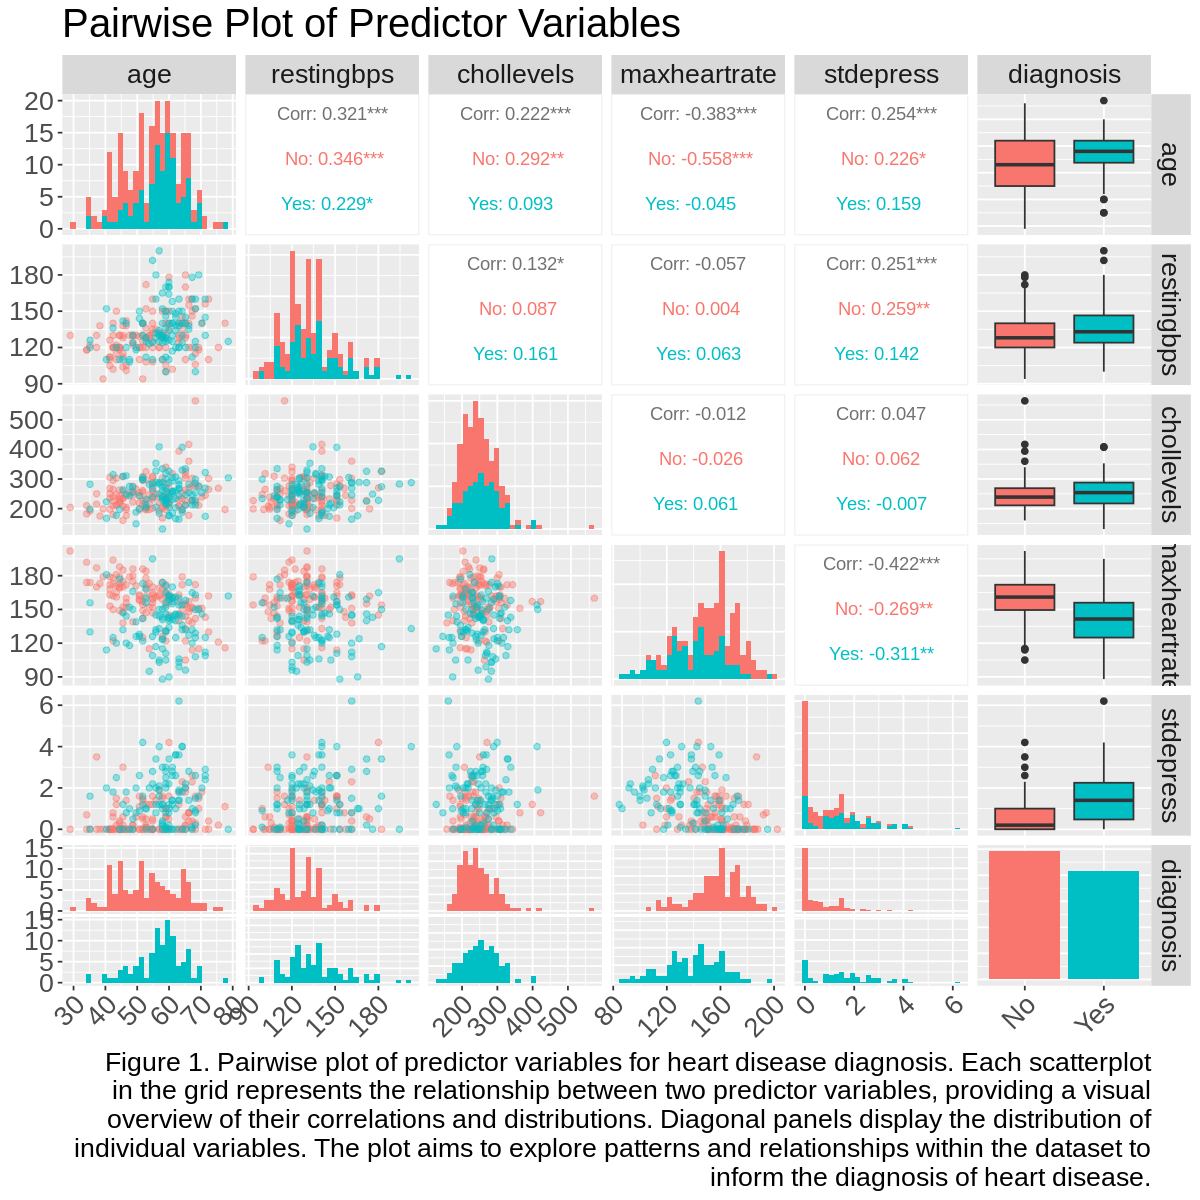

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10) 

heart_pairplot <- heart_train |> 
    ggpairs(
        lower = list(continuous = wrap('points', alpha = 0.4)),
        diag = list(continuous = "barDiag"),
        mapping = aes(color = diagnosis)
    ) +
    theme(text = element_text(size = 20),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(hjust = 1)) +
    labs(
        title = "Pairwise Plot of Predictor Variables",
        caption = str_wrap("Figure 1. Pairwise plot of predictor variables for heart disease diagnosis. Each scatterplot in the grid represents the relationship between two predictor variables, providing a visual overview of their correlations and distributions. Diagonal panels display the distribution of individual variables. The plot aims to explore patterns and relationships within the dataset to inform the diagnosis of heart disease.
" , width = 95))
heart_pairplot


In [7]:
set.seed(4321)
#recipie stuff
knn_heart_recipe <- recipe(diagnosis ~ age + restingbps + chollevels + maxheartrate +stdepress, data = heart_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())


knn_heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 10, strata = diagnosis)

knn_results <- workflow() |>
      add_recipe(knn_heart_recipe) |>
      add_model(knn_heart_spec) |>
      fit(data = heart_train) |>
      tune_grid(resamples = heart_vfold, grid = 20) |>
      collect_metrics()

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

Warning message:
“tune samples were requested but there were 227 rows in the data. 222 will be used.”


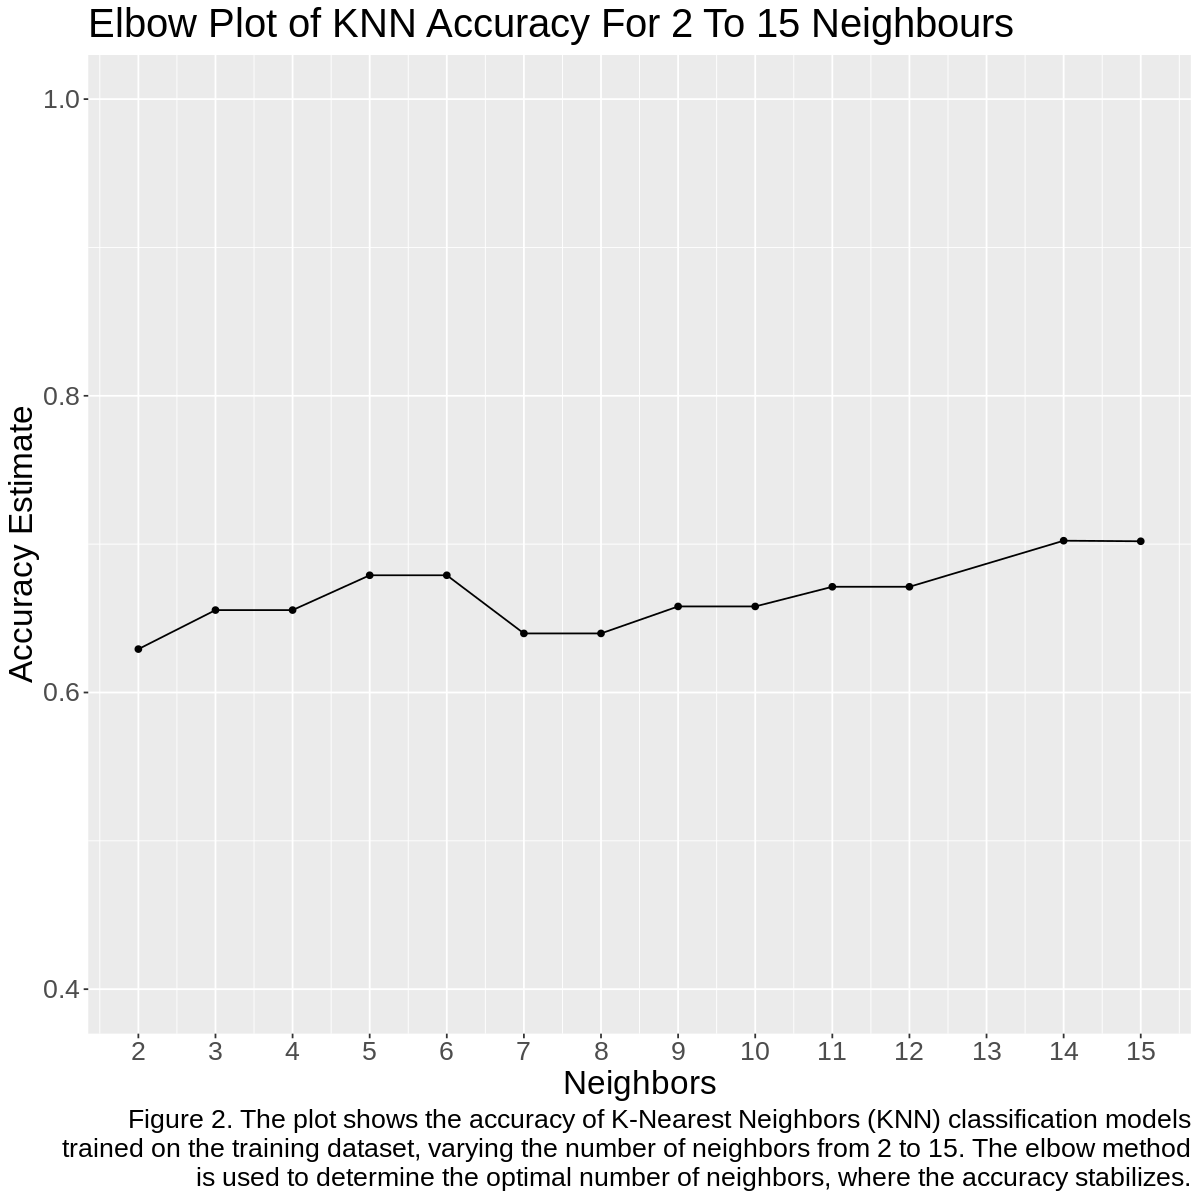

In [8]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate") +
        scale_x_continuous(breaks = seq(0, 20, by = 1)) +
        scale_y_continuous(limits = c(0.4, 1.0)) +
        theme(text = element_text(size = 20)) +
        labs(
        title = "Elbow Plot of KNN Accuracy For 2 To 15 Neighbours",
        caption = str_wrap("Figure 2. The plot shows the accuracy of K-Nearest Neighbors (KNN) classification models trained on the training dataset, varying the number of neighbors from 2 to 15. The elbow method is used to determine the optimal number of neighbors, where the accuracy stabilizes.
" , width = 95))

accuracy_versus_k

In [9]:
knn_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_final_fit <- workflow() |>
    add_recipe(knn_heart_recipe) |>
    add_model(knn_final_spec) |>
    fit(data = heart_train)


heart_test_predictions <- predict(heart_final_fit , heart_test) |>
      bind_cols(heart_test)

heart_test_predictions <- heart_test_predictions |> mutate(predresult = case_when(
    .pred_class == "Yes" & diagnosis == "Yes" ~ "TP",
    .pred_class == "No" & diagnosis == "No" ~ "TN",
    .pred_class == "Yes" & diagnosis == "No" ~ "FP",
    .pred_class == "No" & diagnosis == "Yes" ~ "FN",
    TRUE ~ "Other"
  ))

heart_test_predictions <- heart_test_predictions |> mutate(predcorrect = case_when(
    .pred_class == "Yes" & diagnosis == "Yes" ~ "True",
    .pred_class == "No" & diagnosis == "No" ~ "True",
    .pred_class == "Yes" & diagnosis == "No" ~ "False",
    .pred_class == "No" & diagnosis == "Yes" ~ "False",
    TRUE ~ "Other"
  ))

heart_prediction_accuracy <- heart_test_predictions |>
        metrics(truth = diagnosis, estimate = .pred_class)             

heart_prediction_accuracy


.metric  .estimator .estimate
1 accuracy binary     0.7763158
2 kap      binary     0.5450704

Table 3: Accuracy metrics for the final model. Our final model has an accuracy of 77.6% on our test data.

In [10]:
heart_mat <- heart_test_predictions |> 
      conf_mat(truth = diagnosis, estimate = .pred_class)

heart_mat

          Truth
Prediction No Yes
       No  35  11
       Yes  6  24

Table 4: Confusion Matrix for final model on test data. Our model has a sensitivity of 80.0%, a Specificity of 76.1%, and a Precision of 68.5%.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


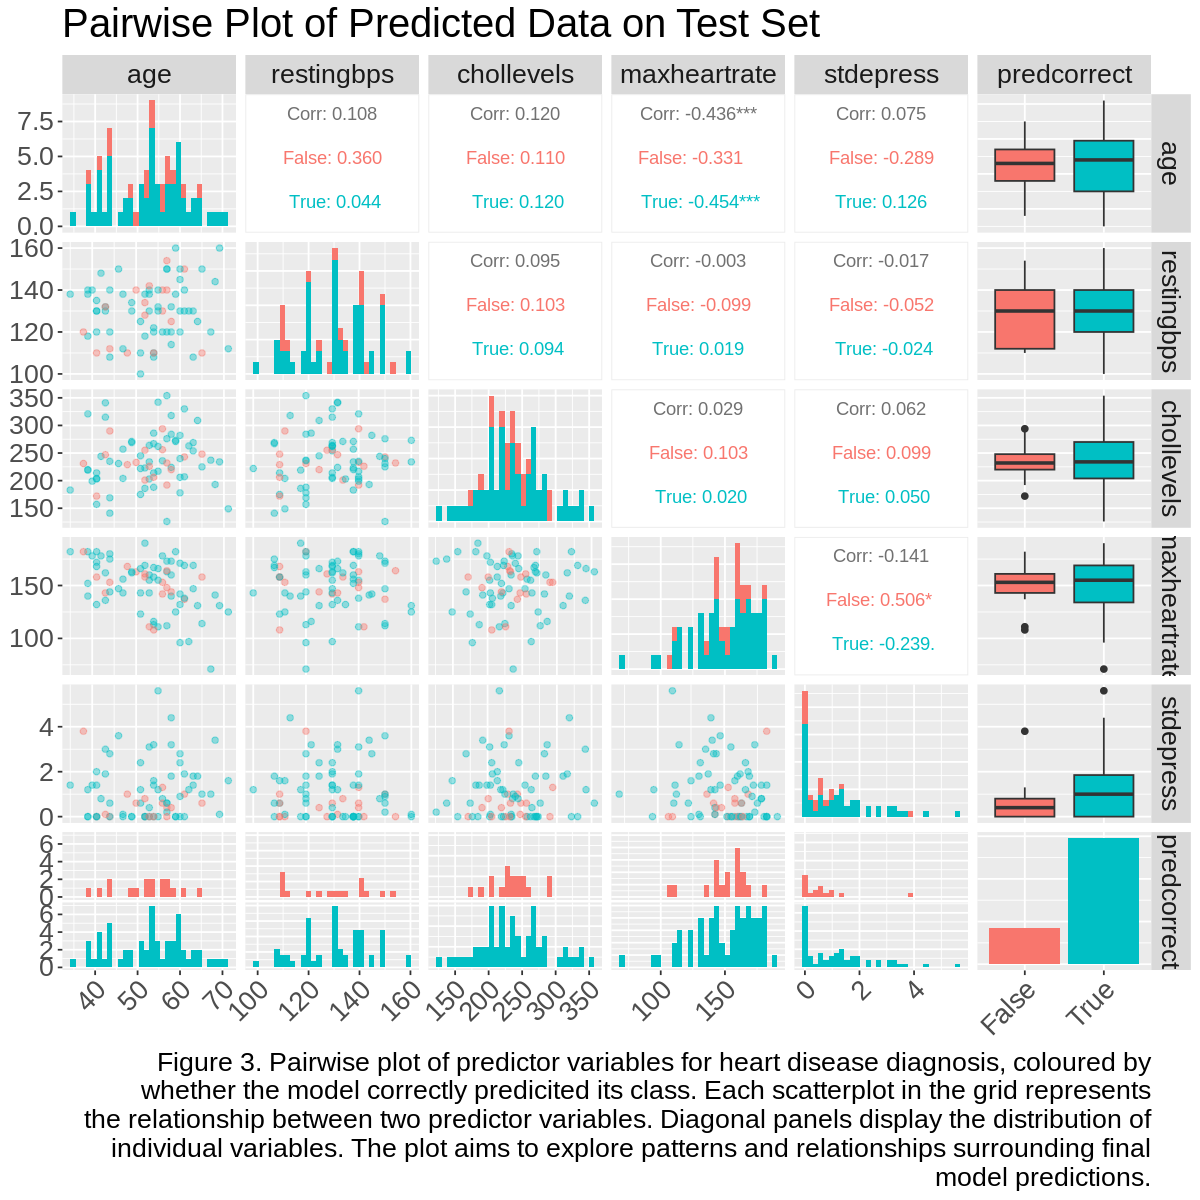

In [11]:
heart_confusion_pairplot <- heart_test_predictions|> 
    select(age, restingbps, chollevels, maxheartrate, stdepress, predcorrect) |>
    ggpairs(
        lower = list(continuous = wrap('points', alpha = 0.4)),
        diag = list(continuous = "barDiag"),
        mapping = aes(color = predcorrect)
    ) +
    theme(text = element_text(size = 20),
        axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(hjust = 1))+
    labs(
        title = "Pairwise Plot of Predicted Data on Test Set",
        caption = str_wrap("Figure 3. Pairwise plot of predictor variables for heart disease diagnosis, coloured by whether the model correctly predicited its class. Each scatterplot in the grid represents the relationship between two predictor variables. Diagonal panels display the distribution of individual variables. The plot aims to explore patterns and relationships surrounding final model predictions.
" , width = 95))

heart_confusion_pairplot


## Methods and Results
To begin our analysis, we followed standard data retrieval and cleaning steps. These include downloading the data from a GitHub repo, cleaning NULL fields, setting the diagnosis variable to the factor data type to be used in the classifier, and splitting the data into our training and testing sets. 

We then conducted an exploratory data analysis by finding various aggregated metrics for each predictive variable, including the mean, standard deviation, minimum and maximum values, as well as the number of empty cells. We checked the distribution of positive and negative diagnoses to determine if any resampling techniques were required. Finally, we created a pairwise plot to compare each pair of predictor variables to visualize any relationships between variables, the overall distributions of the positive and negative diagnosis sets, and other trends in our variables.

Our exploratory analysis provided some insight into existing relationships in our dataset. From our distribution plots, we can see that people diagnosed with heart disease on average were older, had lower max heart rates, and had higher ST depressions compared to those that were not diagnosed with heart disease. This is consistent with our expectations, and scientific literature (6,7). However, there seemed to be a much weaker relationship between cholesterol levels and resting blood pressure and heart disease in this data set, since on average both the groups with a heart disease diagnosis and without had very similar average cholesterol levels and resting blood pressure. 

To select our K value, we conducted 5-fold cross validation to assess the performance of our KNN model across a range of neighbor values. This involves creating the recipe, including scaling and centering our data,  creating our KNN Classification model with hyperparameter tuning, splitting our training data into cross validation folds, and running the model on the hyperparameters. We plotted the accuracy of each neighbor value on an elbow plot to determine the optimal k value for our model.

From our plot, we determined 5 neighbors would have the optimal accuracy. This value was chosen as it is the point in our elbow plot where additional neighbors did not substantially increase the accuracy of our model.  We created our final model using 5 neighbors, and ran our model on the testing data. From our testing data, we achieved an accuracy of 77.6%. As well, our model had a sensitivity of 80.0%, a specificity of 76.1%, and a precision of 68.5%. To visualize the results of our testing data, we once again created a pairwise plot to determine whether there were any relationships between our false predictions, however none were significant.

## Discussion
We ultimately found that we could predict whether a patient in our testing set had heart disease with  77% accuracy using our 5 predictor variables. These results align well with initial expectations, given our research, demonstrating effective prediction of heart disease. As well, our model had relatively higher specificity than precision, indiciating our model is more likely to predict false positives than false negatives which is our preference for a model for medical purposes - in this case, a false negative is more dangerous than a false positive.

We did not find any trends or relationships in the false predictions in our model, as shown in our second pairplot, indicating there were no issues systemic to our model that would cause certain attributes to result in a higher or lower probability of a false prediction.

The implication of our findings can significantly enhance the early diagnosis and treatment of heart disease, potentially leading to improved patient outcomes and reducing healthcare costs. Early and accurate prediction of heart disease allows more timely and targeted intervention, which is crucial in managing the disease’s progression and mitigating the burden on the healthcare system.


This project provides a strong foundation for future questions in heart disease modeling. Given our relatively small dataset (around 250 training data points) and only 5 predictor variables, we were able to create a fairly accurate model. A next step for this project could include enhancing our dataset with additional variables or more data points to create a more robust model, as well as to determine whether other predictive variables have a strong correlation with heart disease. 


Another area we would like to explore is the independence of the predictor variables; understanding their interdependencies could refine our model’s predictive power. This could be done through a feature importance or permutation importance analysis to determine whether specific predictor variables have a larger impact on the accuracy of the model, and what that could mean for diagnosis and treatment.


For a more complex model, we could also utilize a longitudinal dataset to investigate the influence of fluctuations in critical variables over time on the likelihood of heart disease. This could look like, for example, taking measurements over the course of many years to add additional dimensions to our model and provide insights on early warning signs for heart disease onset. Given the complexity of a temporal dimension, a different model other than KNN may be more suitable for this type of classification problem, such as Random Forests, Logistic Regression or SVMs.


## References
1. Centers for Disease Control and Prevention (CDC) (2023). About Heart Disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/about.htm
2. National Heart, Lung, and Blood Institute. (2022). Coronary Heart Disease - What Is Coronary Heart Disease? | NHLBI, NIH. Www.nhlbi.nih.gov. https://www.nhlbi.nih.gov/health/coronary-heart-disease
3. World Health Organization. (2019).  Cardiovascular Disease. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)
4. Ivey, S. L., Hattie Rees Hanley, Taylor, C., Eveline Oestreicher Stock, Vora, N., Woo, J., Johnson, S. B., & Bairey, N. (2022). Early identification and treatment of women’s cardiovascular risk factors prevents cardiovascular disease, saves lives, and protects future generations: Policy recommendations and take action plan utilizing policy levers. Clinical Cardiology, 45(11), 1100–1106. https://doi.org/10.1002/clc.23921
5. 5anosi,A., Steinbrunn,W., Pfisterer,M., and Detrano,R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.
6. Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019). Cardiovascular Risks Associated with Gender and Aging. Journal of cardiovascular development and disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019
7. Okin, P., Prineas, R., Grandits, G., Rautaharju, P., Cohen, J., Crow R., and Kligfield, P. (1997). Heart Rate Adjustment of Exercise-Induced ST-Segment Depression Identifies Men Who Benefit From a Risk Factor Reduction Program. Circulation. 96:2899–2904 https://doi.org/10.1161/01.CIR.96.9.2899